In [1]:
from opal.visualization.styles import jupyter_style

jupyter_style()

In [2]:
from opal.visualization.plots import *

In [3]:
from opal.opal import load_dataset

try:
    dsets = load_dataset('./RingMultiBunch/', fname='RingMultiBunch.h5')
except Exception as e:
    print ( e )

Start loading files ...

    RingMultiBunch.h5 ... matches H5 file type.

Done.



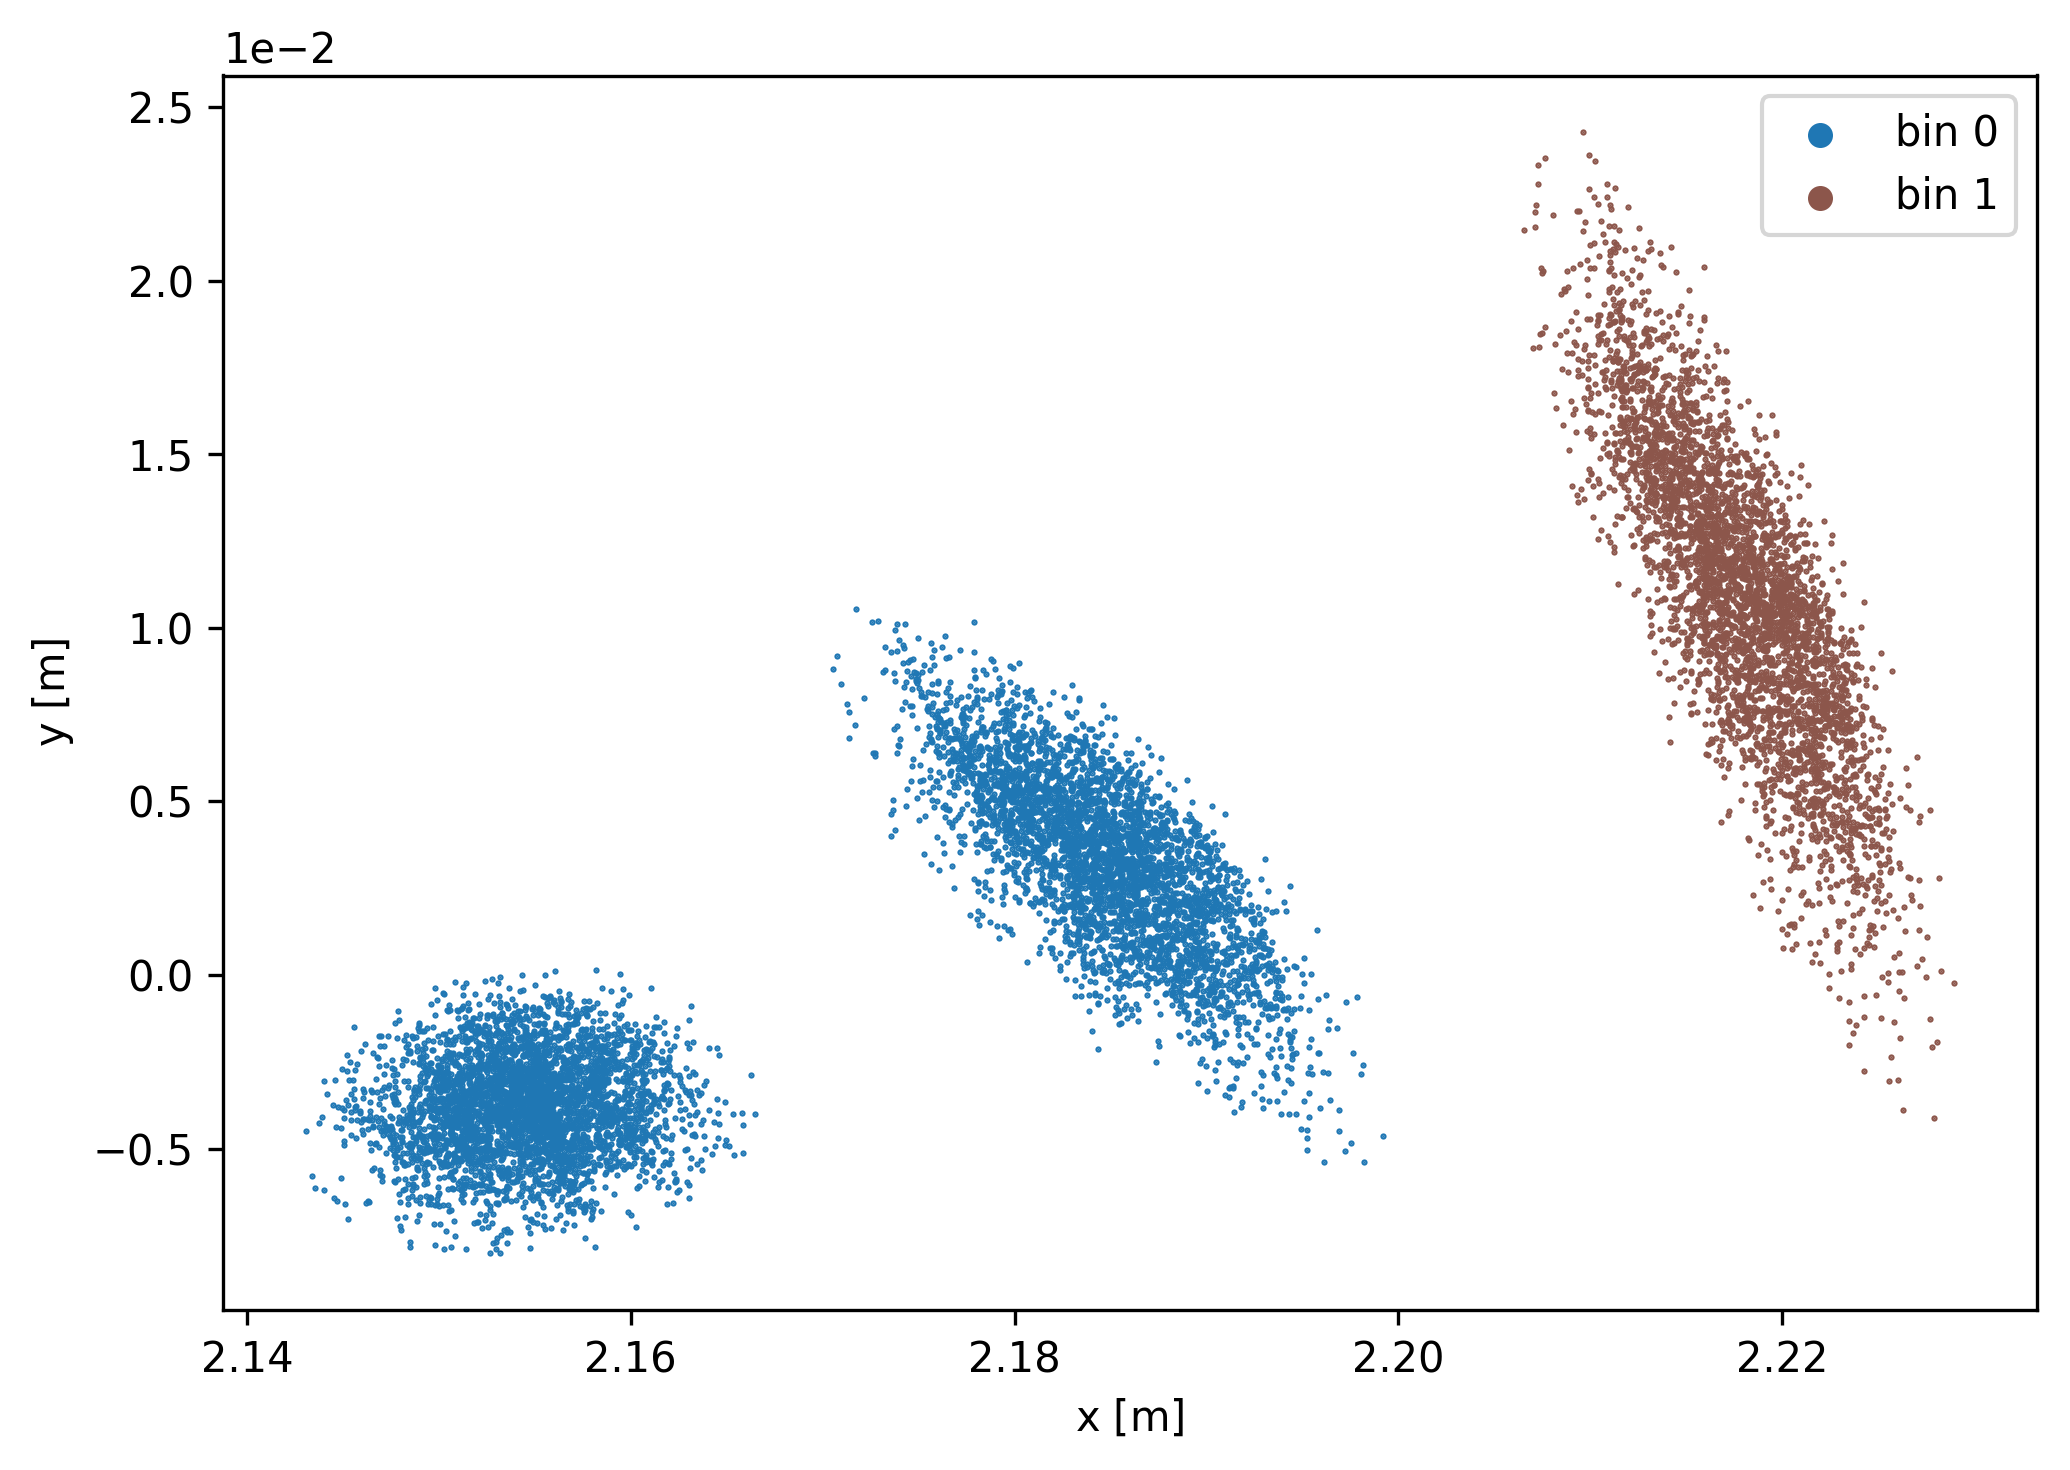

In [4]:
plt = plot_phase_space(dsets[0], 'x', 'y', xsci=True, ysci=True, step=3, bins=[0, 1])

plt.legend(['bin 0', 'bin 1'], markerscale=10)

plt.show()

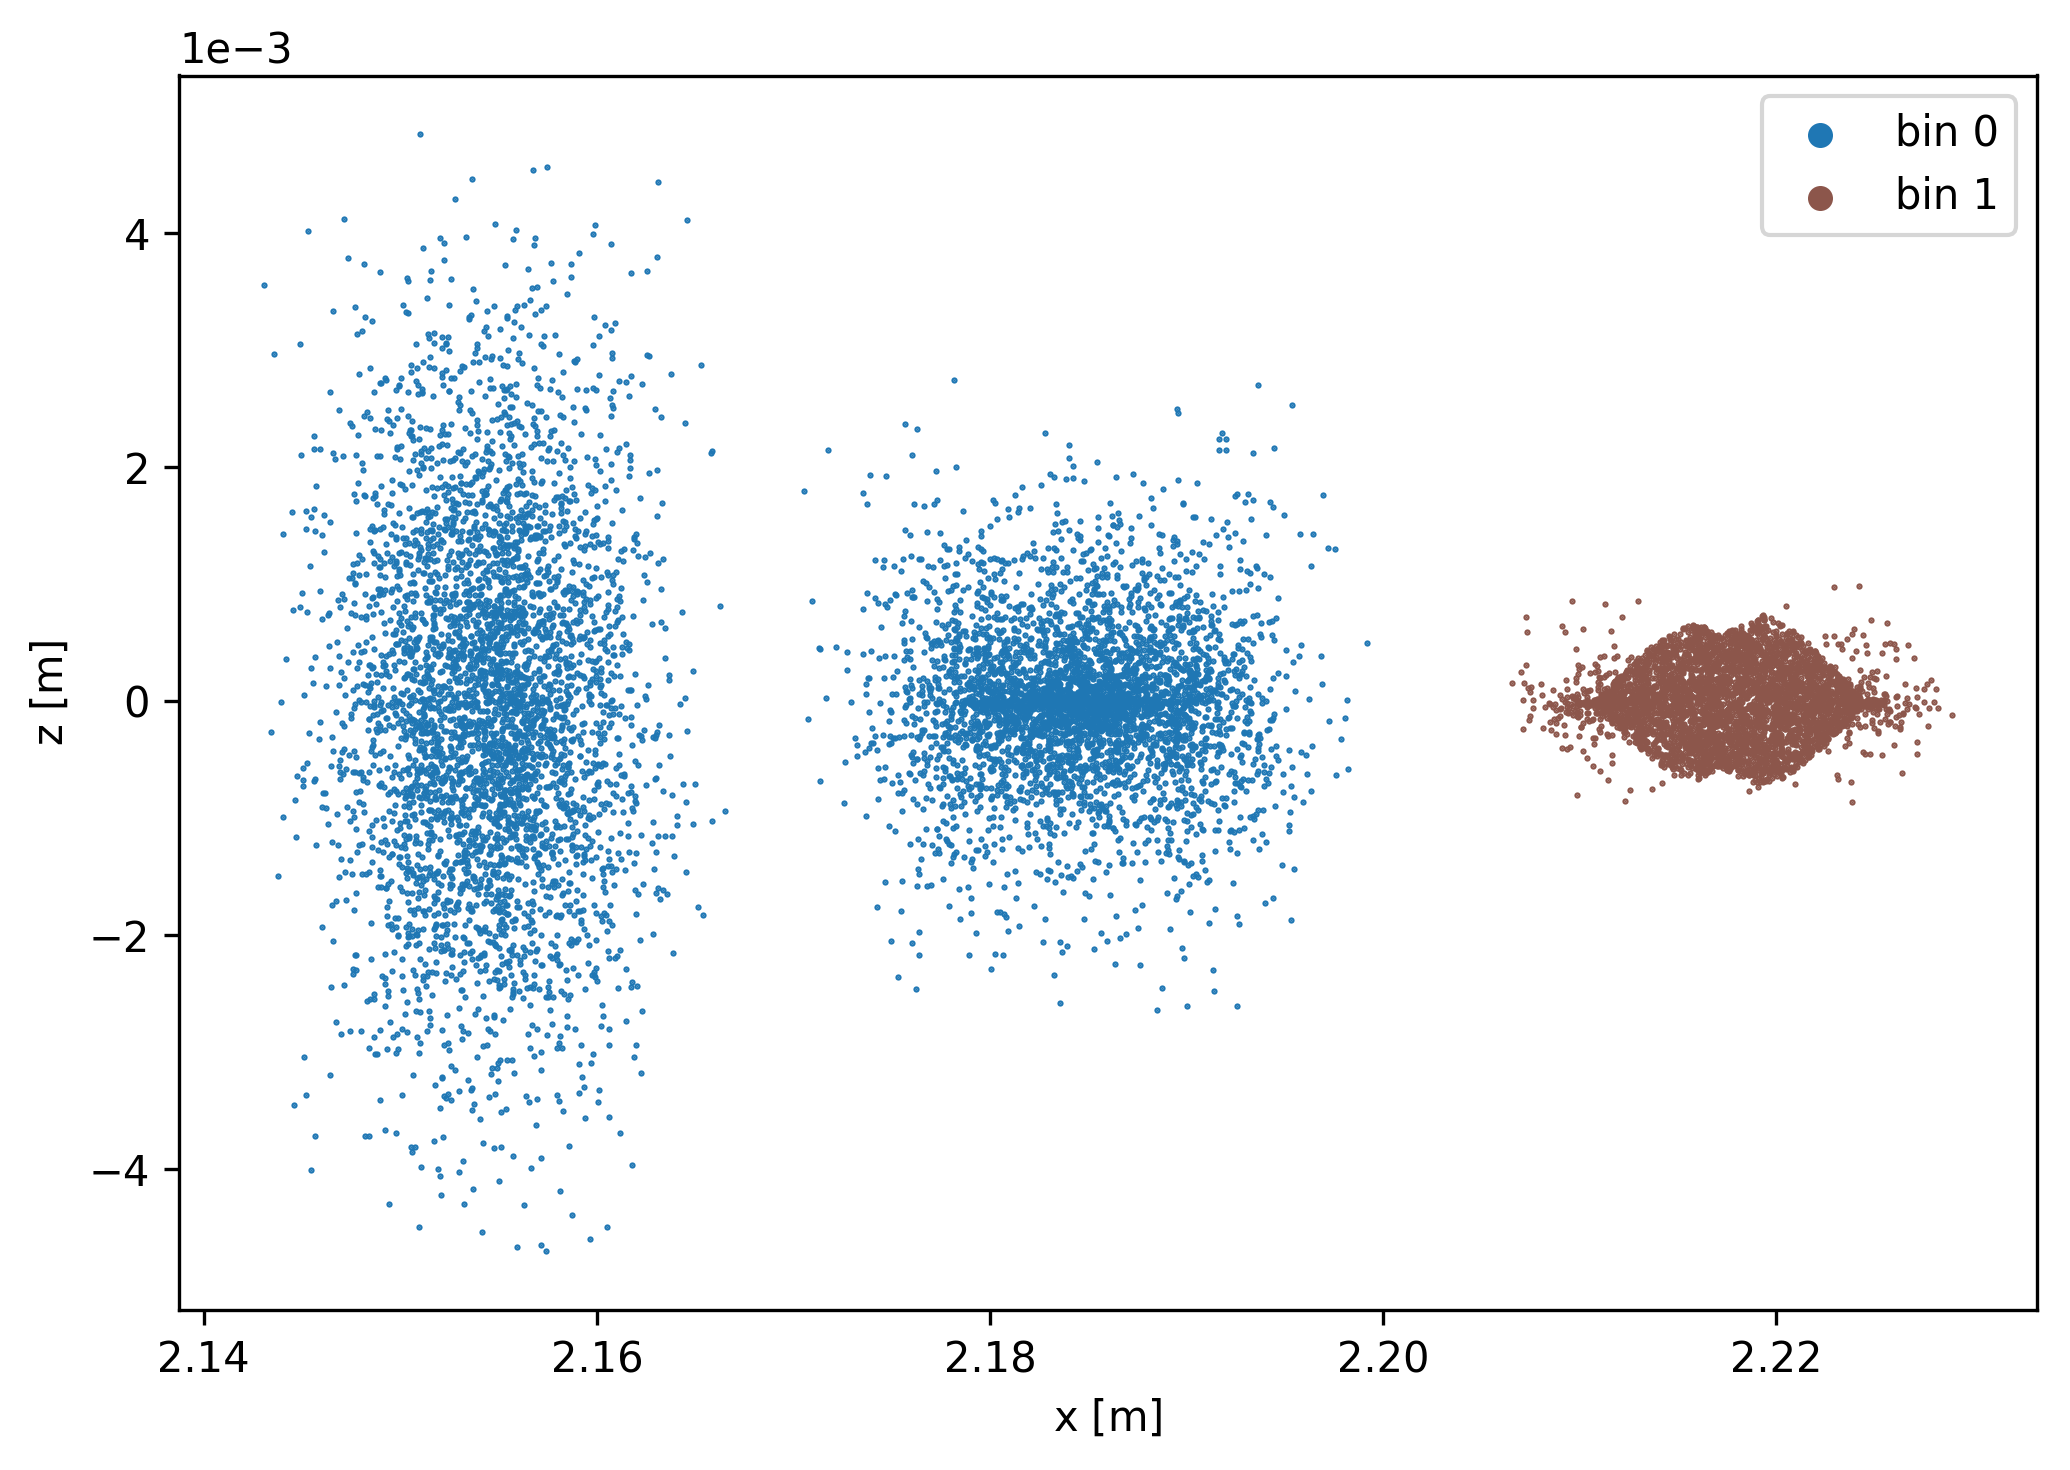

In [5]:
plt = plot_phase_space(dsets[0], 'x', 'z', xsci=True, ysci=True, step=3, bins=[0, 1])

plt.legend(['bin 0', 'bin 1'], markerscale=10)

plt.show()

In [6]:
from opal.statistics import statistics

try:
    print ( "Central moment:  " + str(statistics.moment(dsets[0], 'x', k=1, bin=1, step=3)) )
    
    print ( "Arithmetic mean: " + str(statistics.mean(dsets[0], 'x', bin=1, step=3)) )
    
    print ( "Skewness:        " + str(statistics.skew(dsets[0], 'x', bin=1, step=3)) )
    
    print ( "Kurtosis:        " + str(statistics.kurtosis(dsets[0], 'x', bin=1, step=3)) )
except Exception as e:
    print ( e )

Central moment:  0.0
Arithmetic mean: 2.21775770341
Skewness:        -0.07187704928121756
Kurtosis:        -0.07187704928121756


In [7]:
from opal.analysis import beam

minima = beam.find_beams(dsets[0], 'x', step=3)

print ( minima )

[2.1430608605003947, 2.1690516569482043, 2.2017553081076997, 2.2289509759140169]


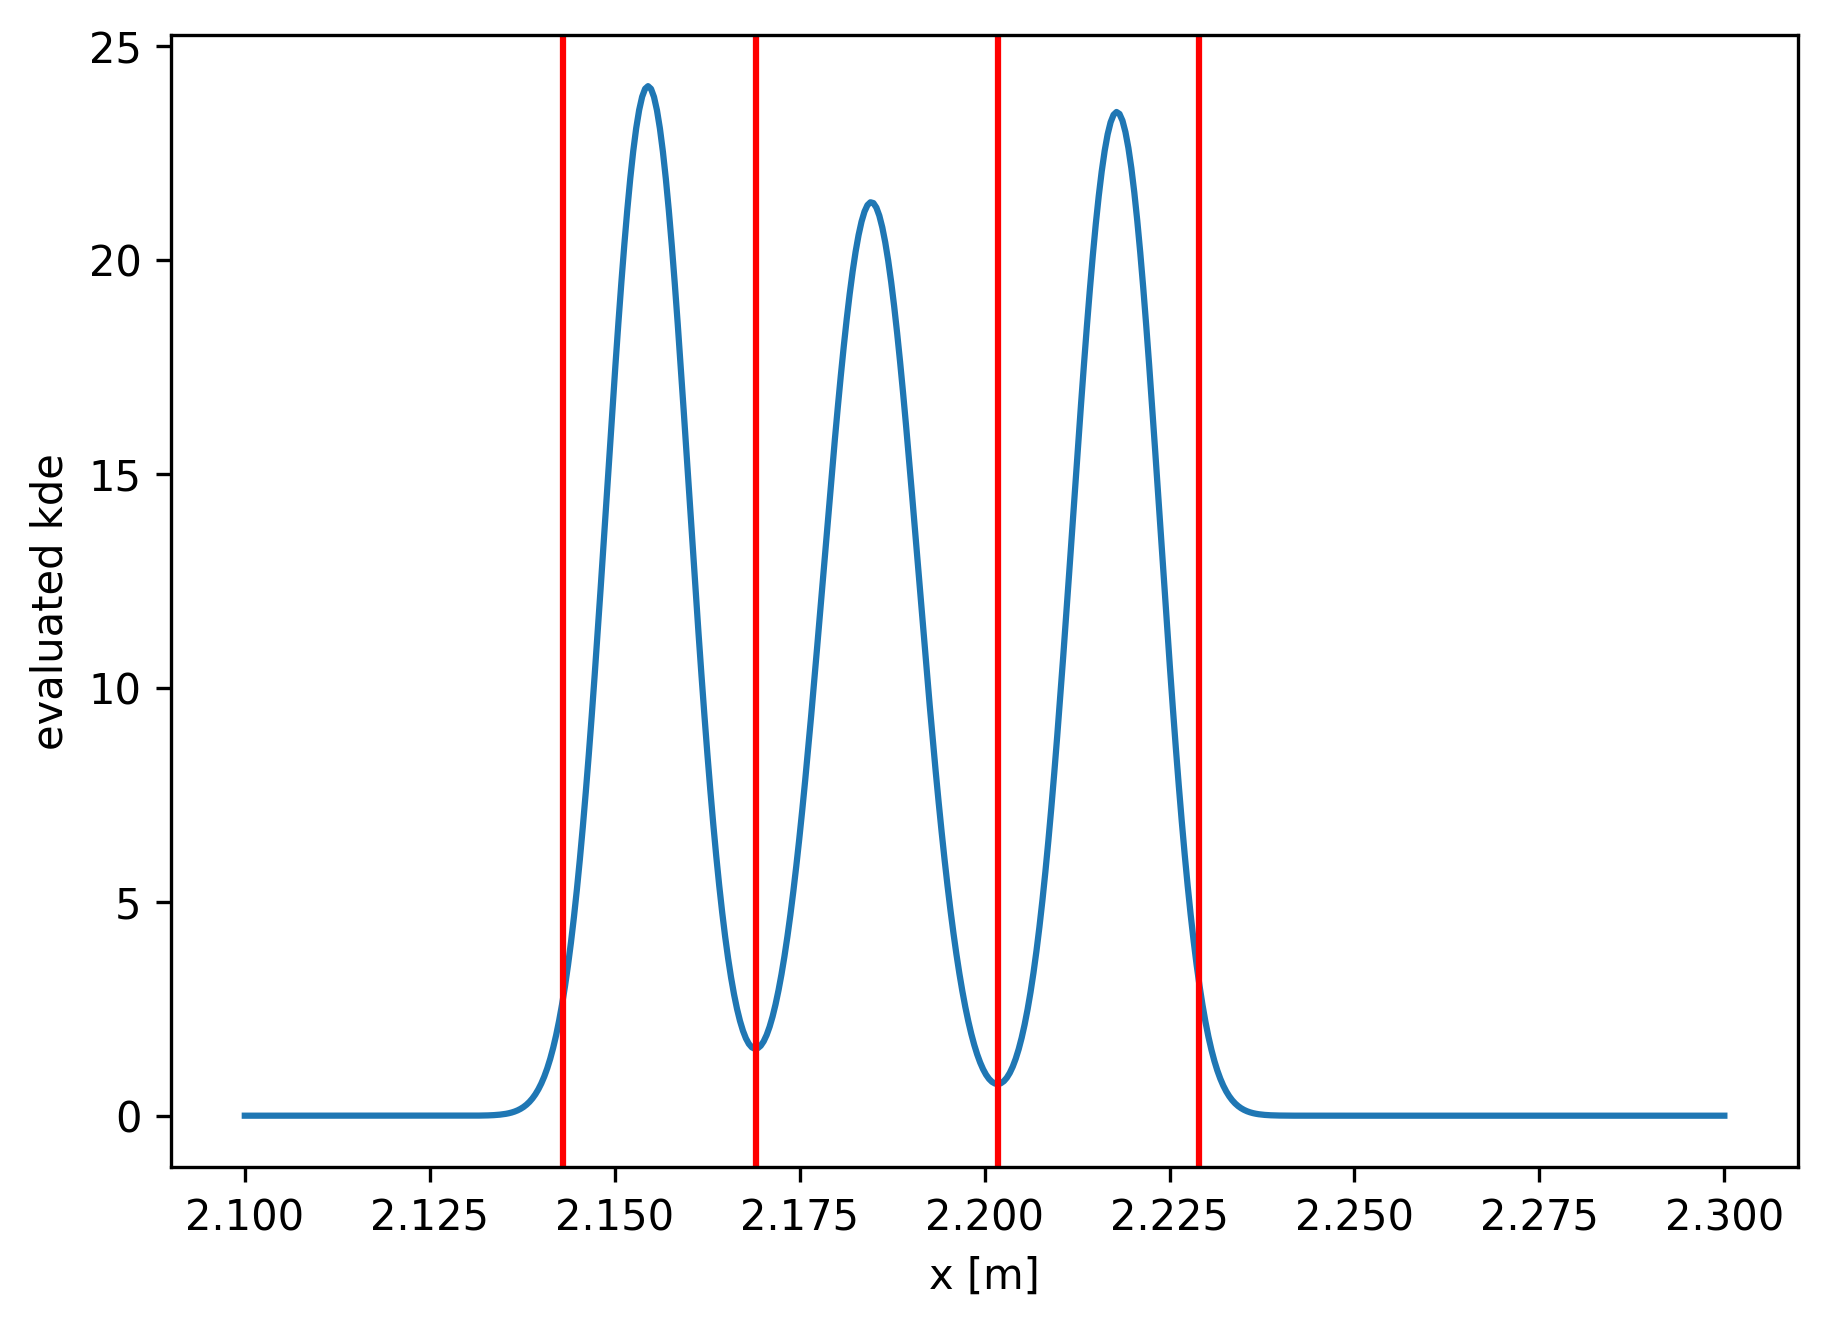

In [8]:
kde = statistics.gaussian_kde(dsets[0], 'x', step=3)

points = np.linspace(2.1, 2.3, 500)

pdf = kde.pdf(points)

plt.plot(points, pdf)
plt.xlabel('x [m]')
plt.ylabel('evaluated kde')

for m in minima:
    plt.axvline(m, color='r')
plt.show()

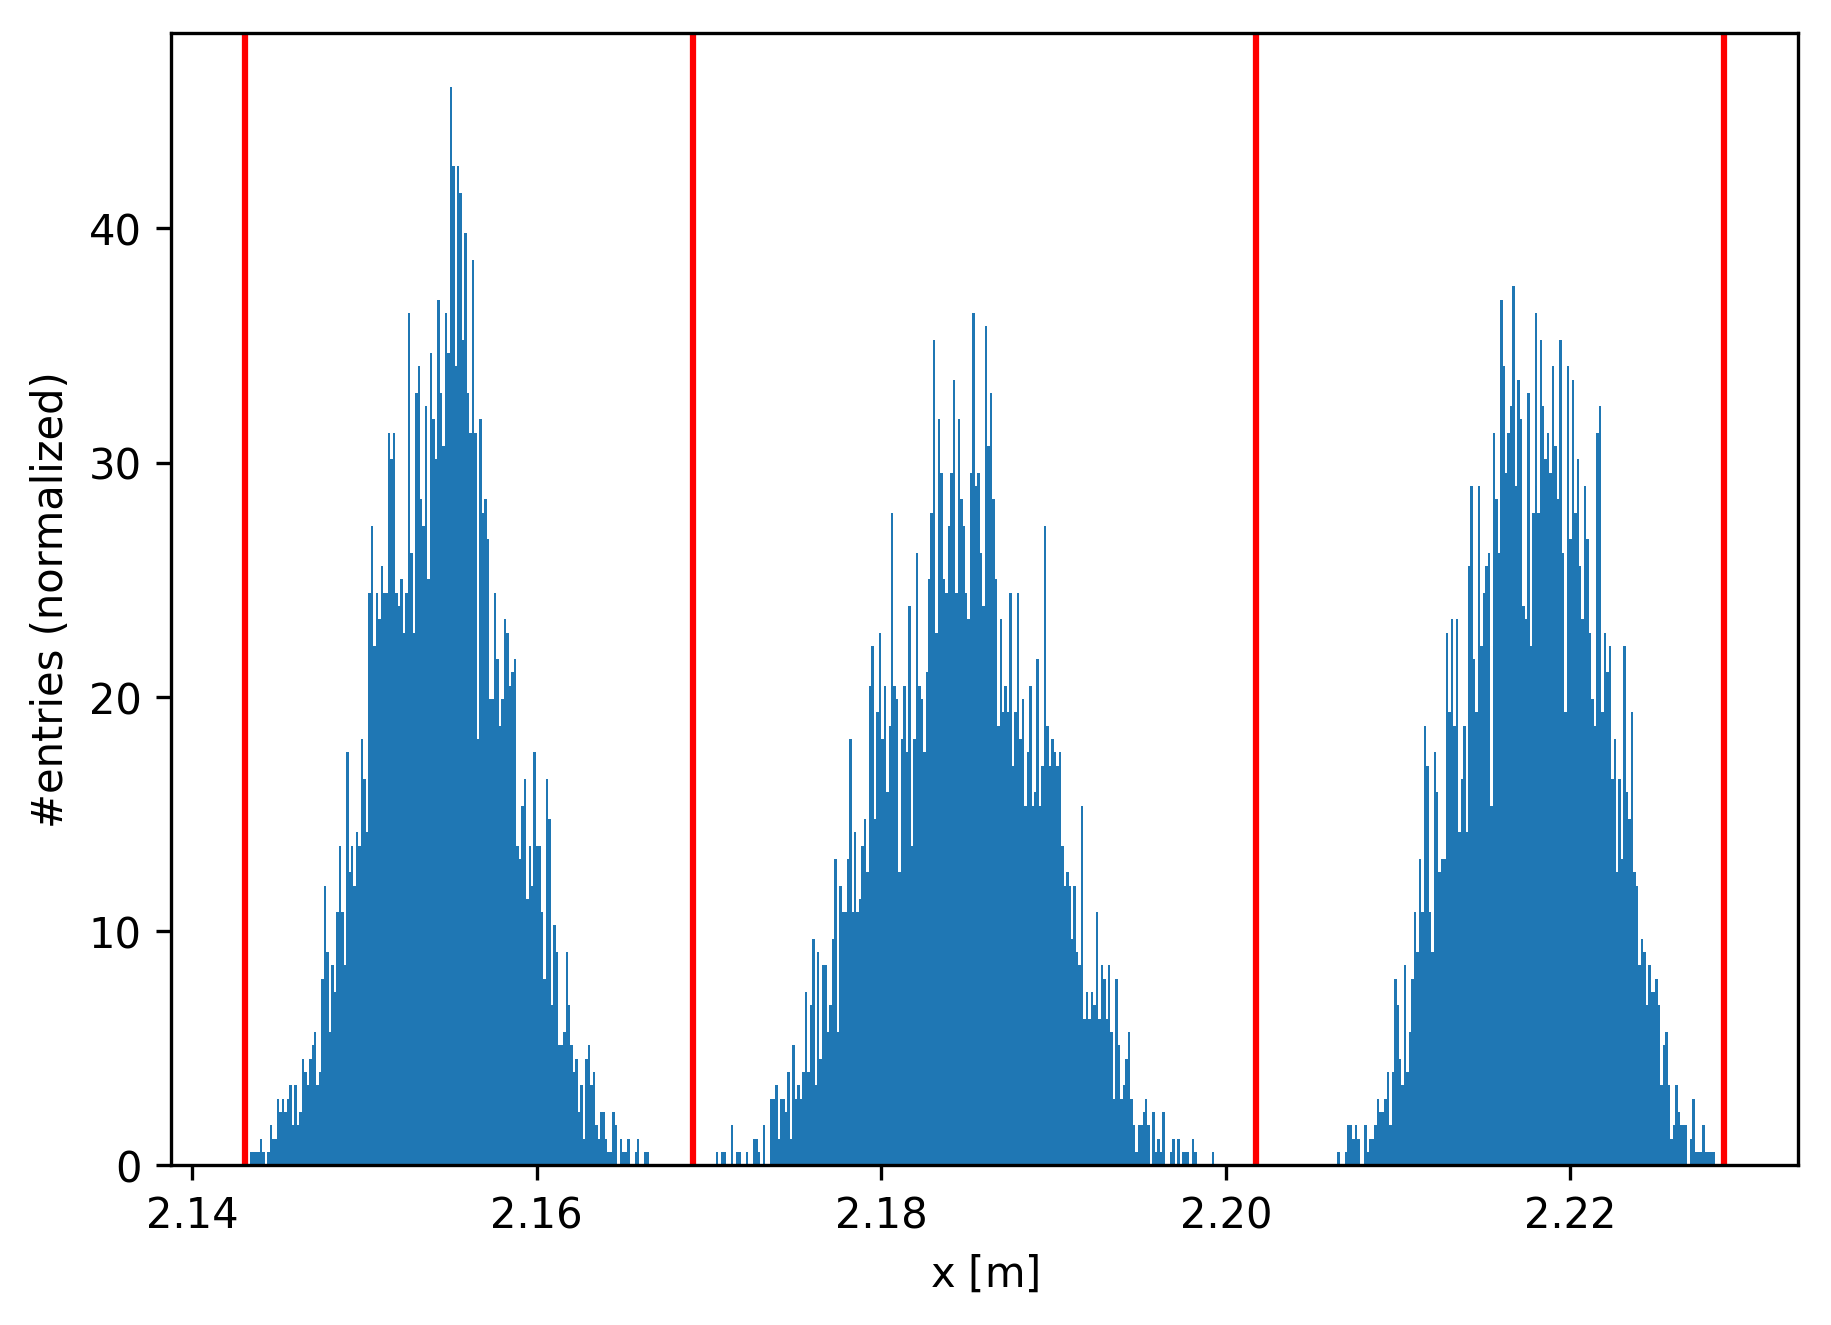

In [9]:
plt = plot_histogram(dsets[0], 'x', step=3, bins=600)

for m in minima:
    plt.axvline(m, color='r')
plt.show()

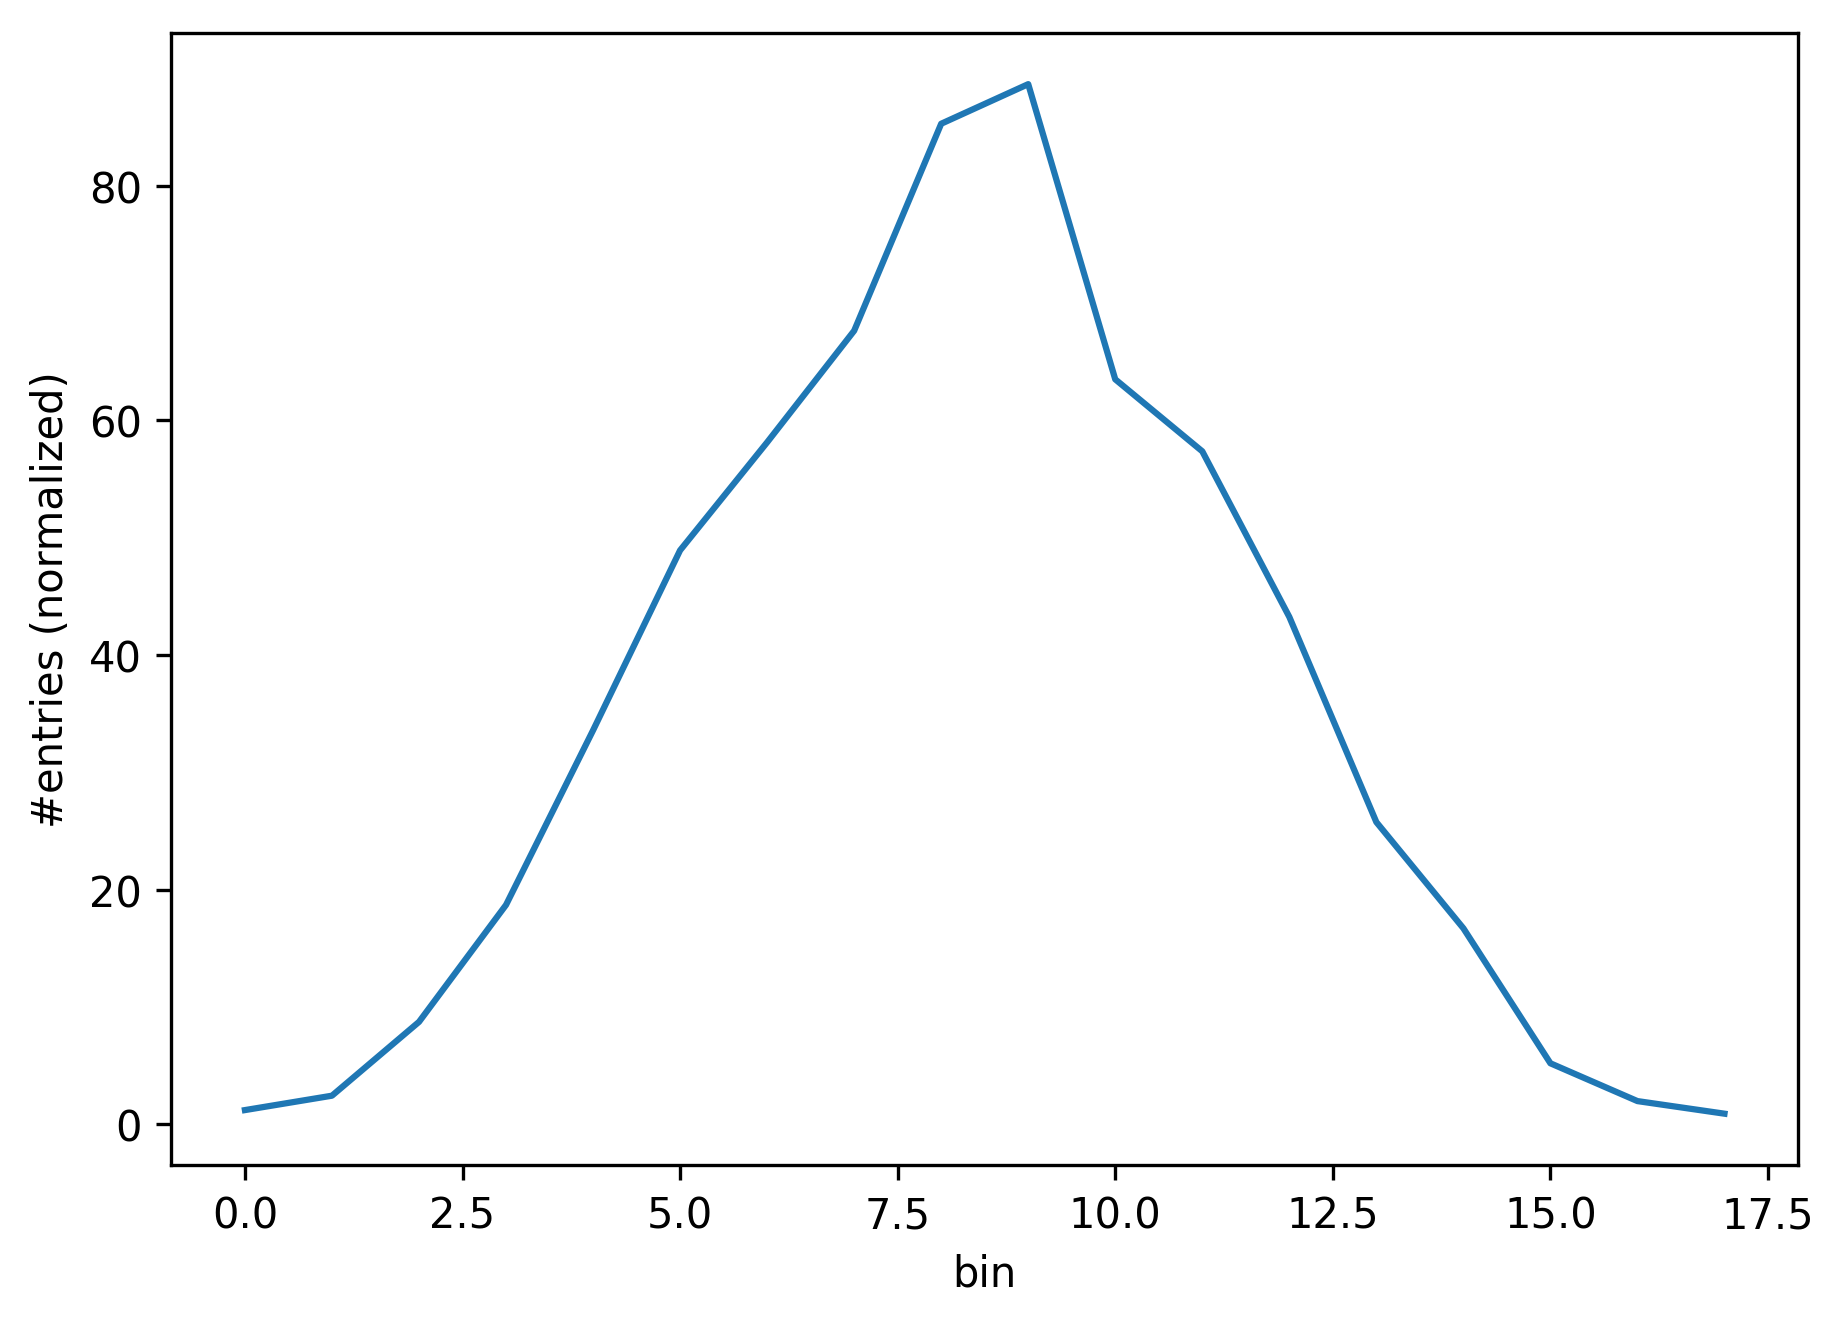

In [10]:
from opal.statistics import impl_statistics

try:
    data = beam.get_beam(dsets[0], 'x', step=3, k=1)

    hist, _ = impl_statistics.histogram(data, bins=18, density=True)
    
    plt.plot(hist)
    plt.xlabel('bin')
    plt.ylabel('#entries (normalized)')
    
    plt.show()
except Exception as e:
    print ( e )

In [11]:
from opal.statistics import impl_statistics
from opal.analysis import impl_beam

try:
    print ( "#particles:          " + str(len(data)) )
    
    print ( "Central moment:      " + str(impl_statistics.moment(data=data, k=1) ) )
    
    print ( "Arithmetic mean:     " + str(impl_statistics.mean(data) ) )
    
    print ( "Skewness:            " + str(impl_statistics.skew(data) ) )
    
    print ( "Kurtosis:            " + str(impl_statistics.kurtosis(data) ) )
    
    print ( "Kurtosis (Wangler):  " + str(impl_beam.halo_ellipsoidal_beam(data)))
    
except Exception as e:
    print ( e )

#particles:          4095
Central moment:      0.0
Arithmetic mean:     2.18463426224
Skewness:            -0.007096386446355243
Kurtosis:            -0.34370961203955064
Kurtosis (Wangler):  0.513433245103


In [12]:
#plt = plot_classification(dsets[0], xvar='x', yvar='y', value=400, step=3)

#plt.show()

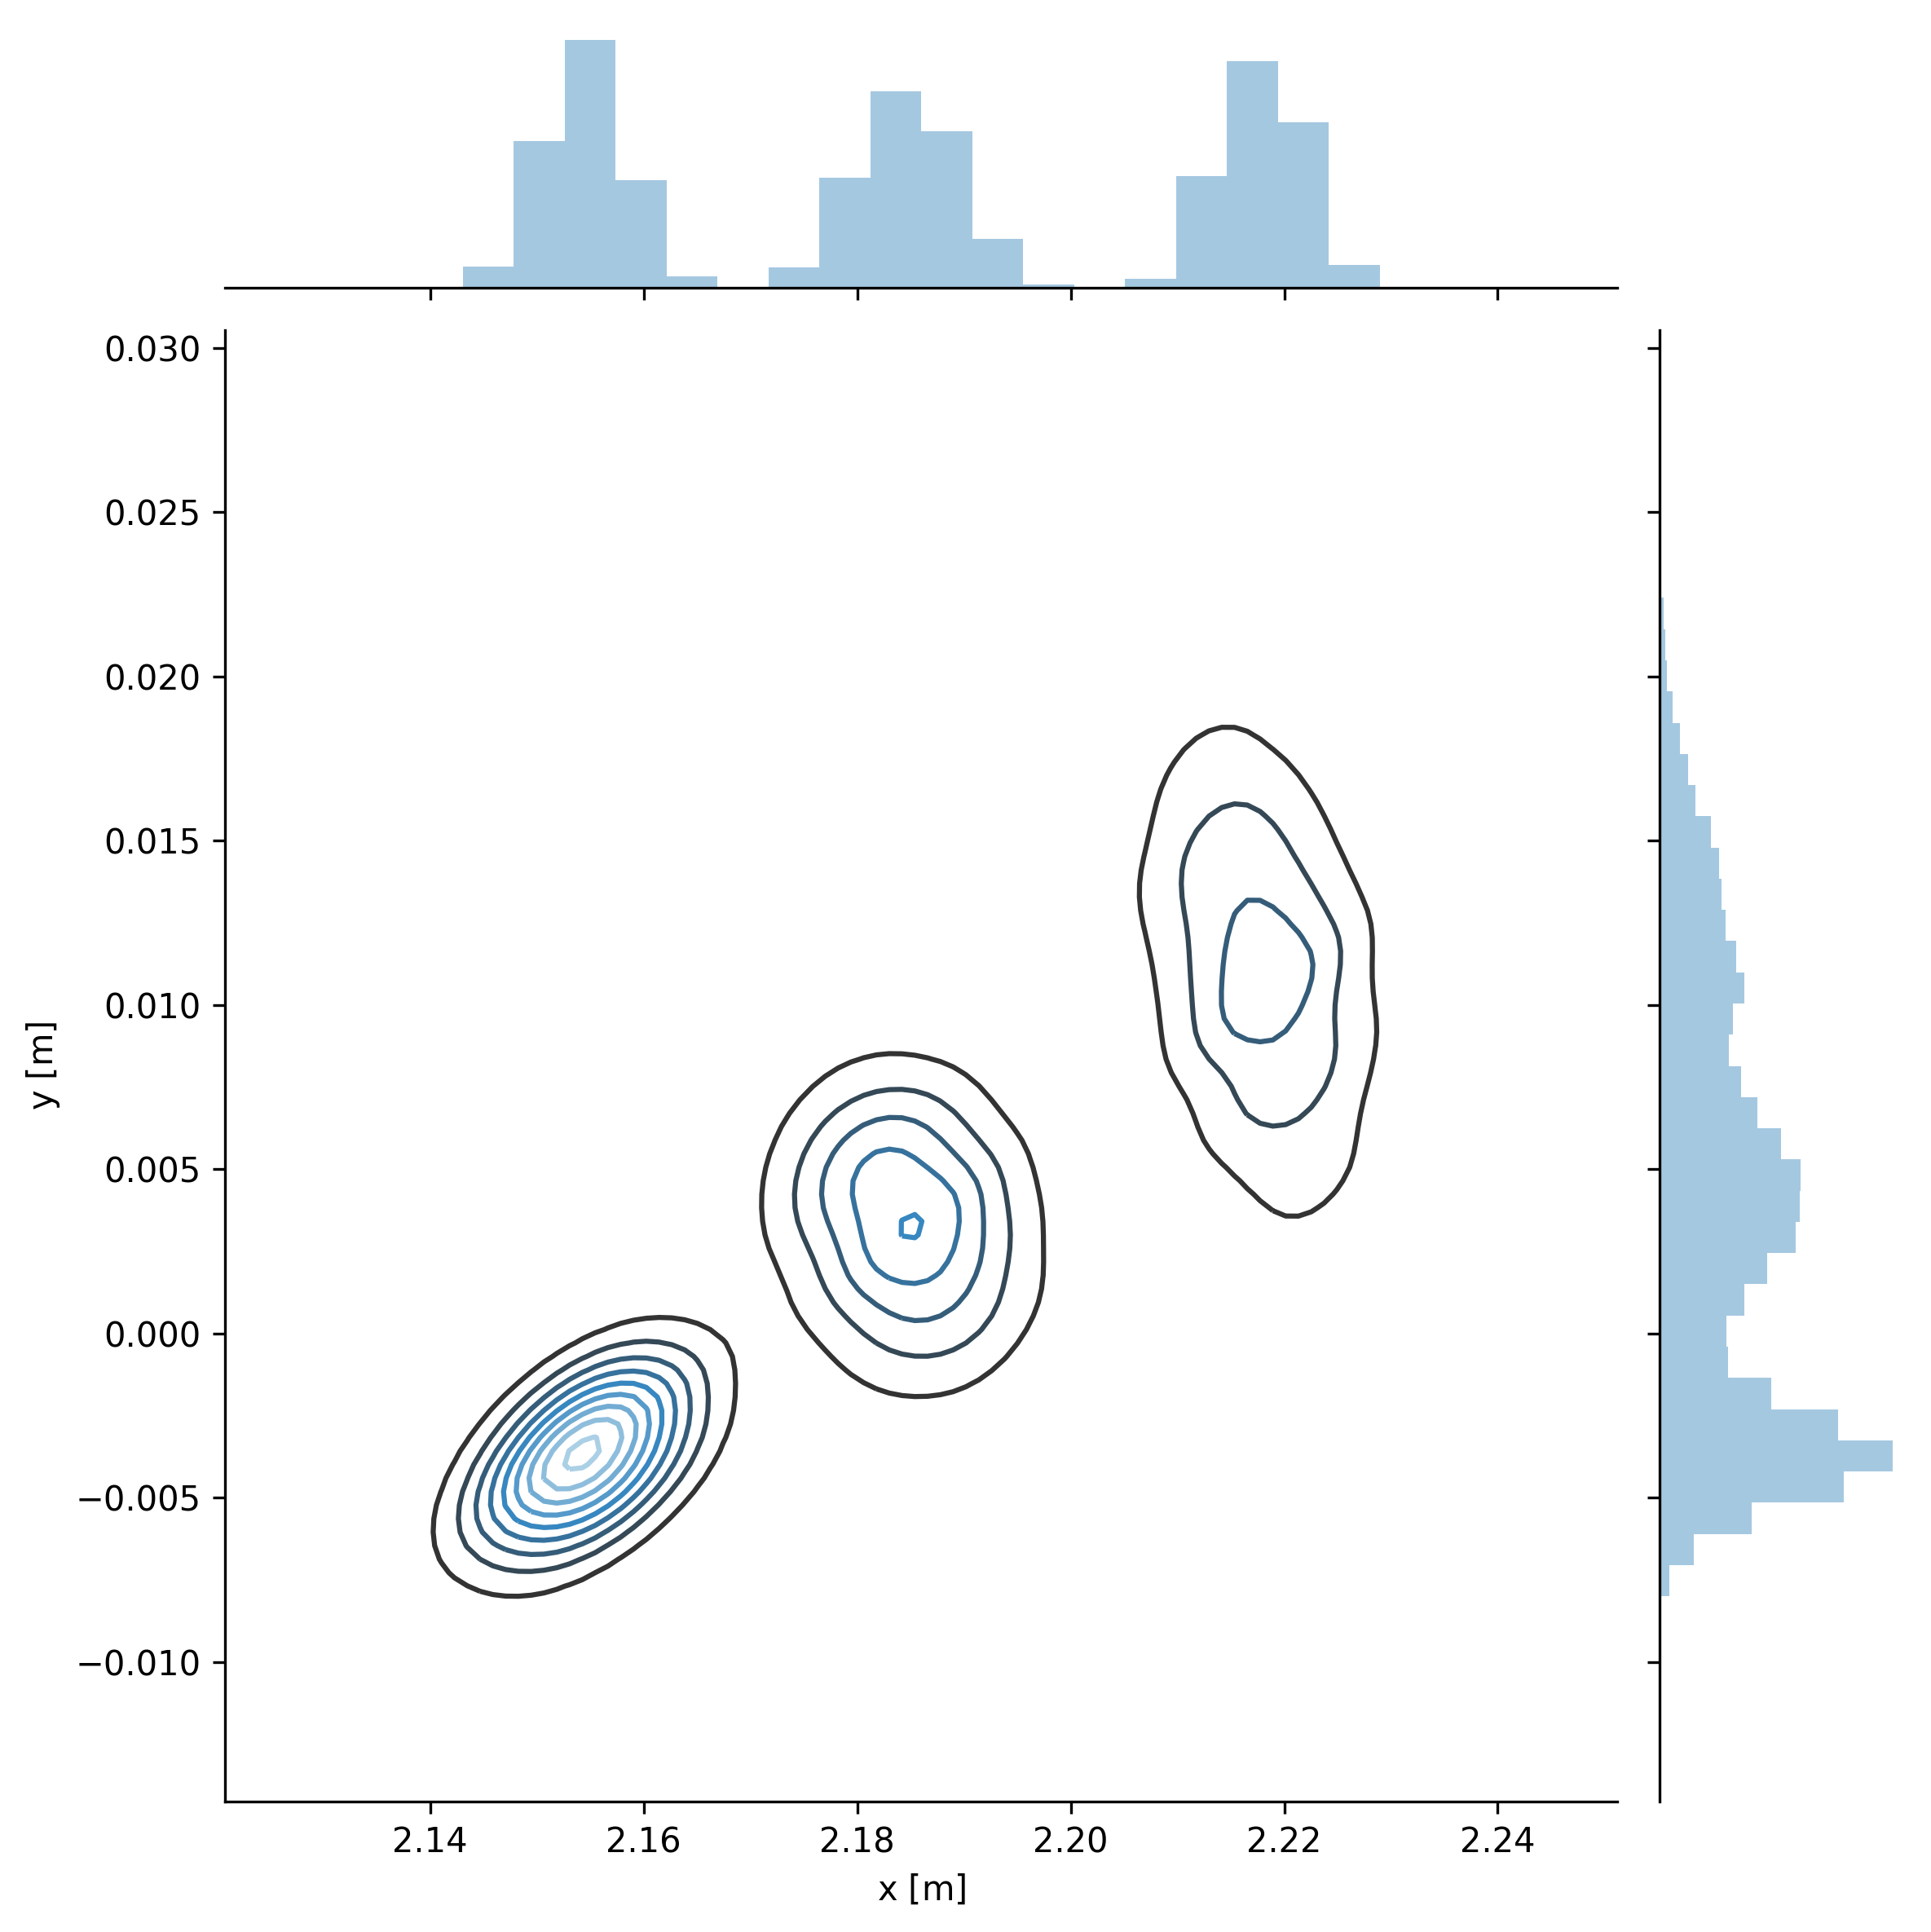

In [13]:
plt = plot_joint(dsets[0], xvar='x', yvar='y', join='contour', step=3)

plt.show()

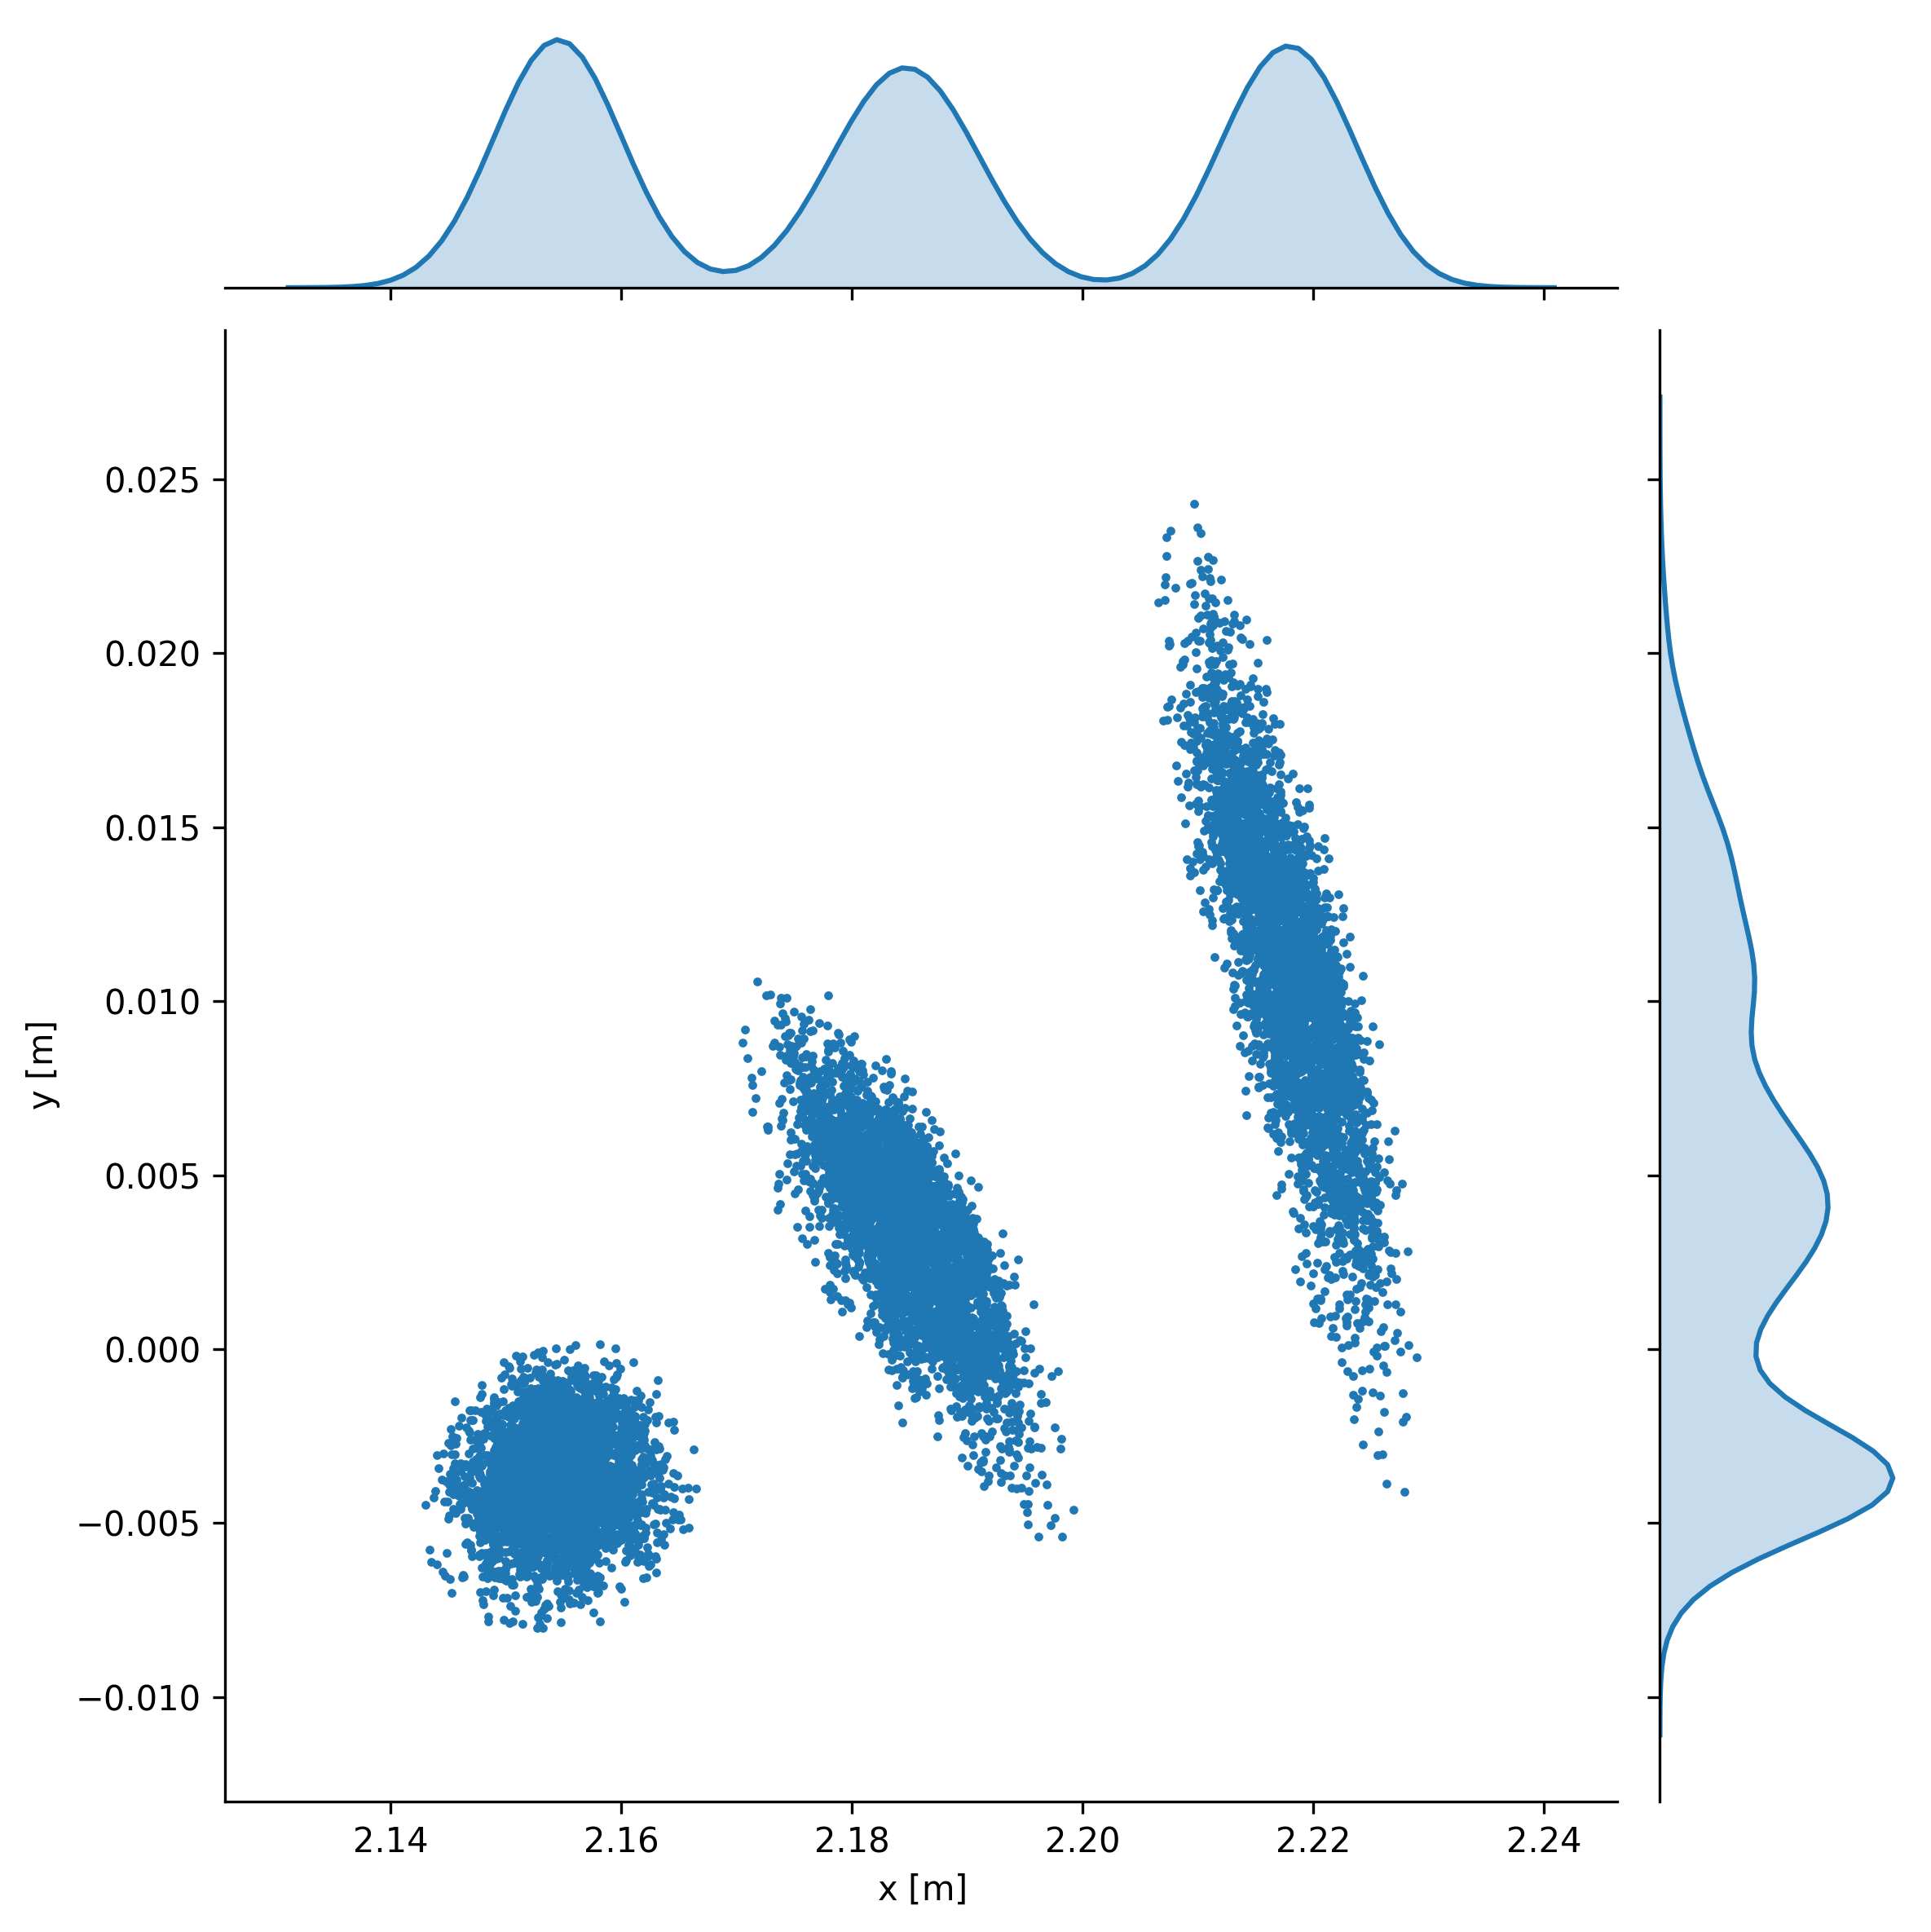

In [14]:
plt = plot_joint(dsets[0], xvar='x', yvar='y', join='scatter', marginals='kde', step=3)

plt.show()

In [15]:
from opal.visualization.statistics import impl_plots

help(impl_plots.plot_joint)

Help on function plot_joint in module opal.visualization.statistics.impl_plots:

plot_joint(xdata, xlab, ydata, ylab, join, **kwargs)
    Do a joint plot (marginals + contour / scatter).
    
    Parameters
    ----------
    xdata   (array)     data of x-axis
    xlab    (str)       label of x-axis data
    ydata   (array)     data oy y-axis
    ylab    (str)       label of y-axis data
    join    (str)       'all', 'contour' or 'scatter'
    
    Optionals
    ---------
    marginals   (str)   'hist', 'kde', 'rug' or combination
                        separated by '+', eg. 'hist+kde'
    size        (int)   size of plot        
    cmap        (str)   colormap
    
    Reference
    ---------
    https://seaborn.pydata.org/generated/seaborn.JointGrid.html
    
    Returns
    -------
    a matplotlib.pyplot handle



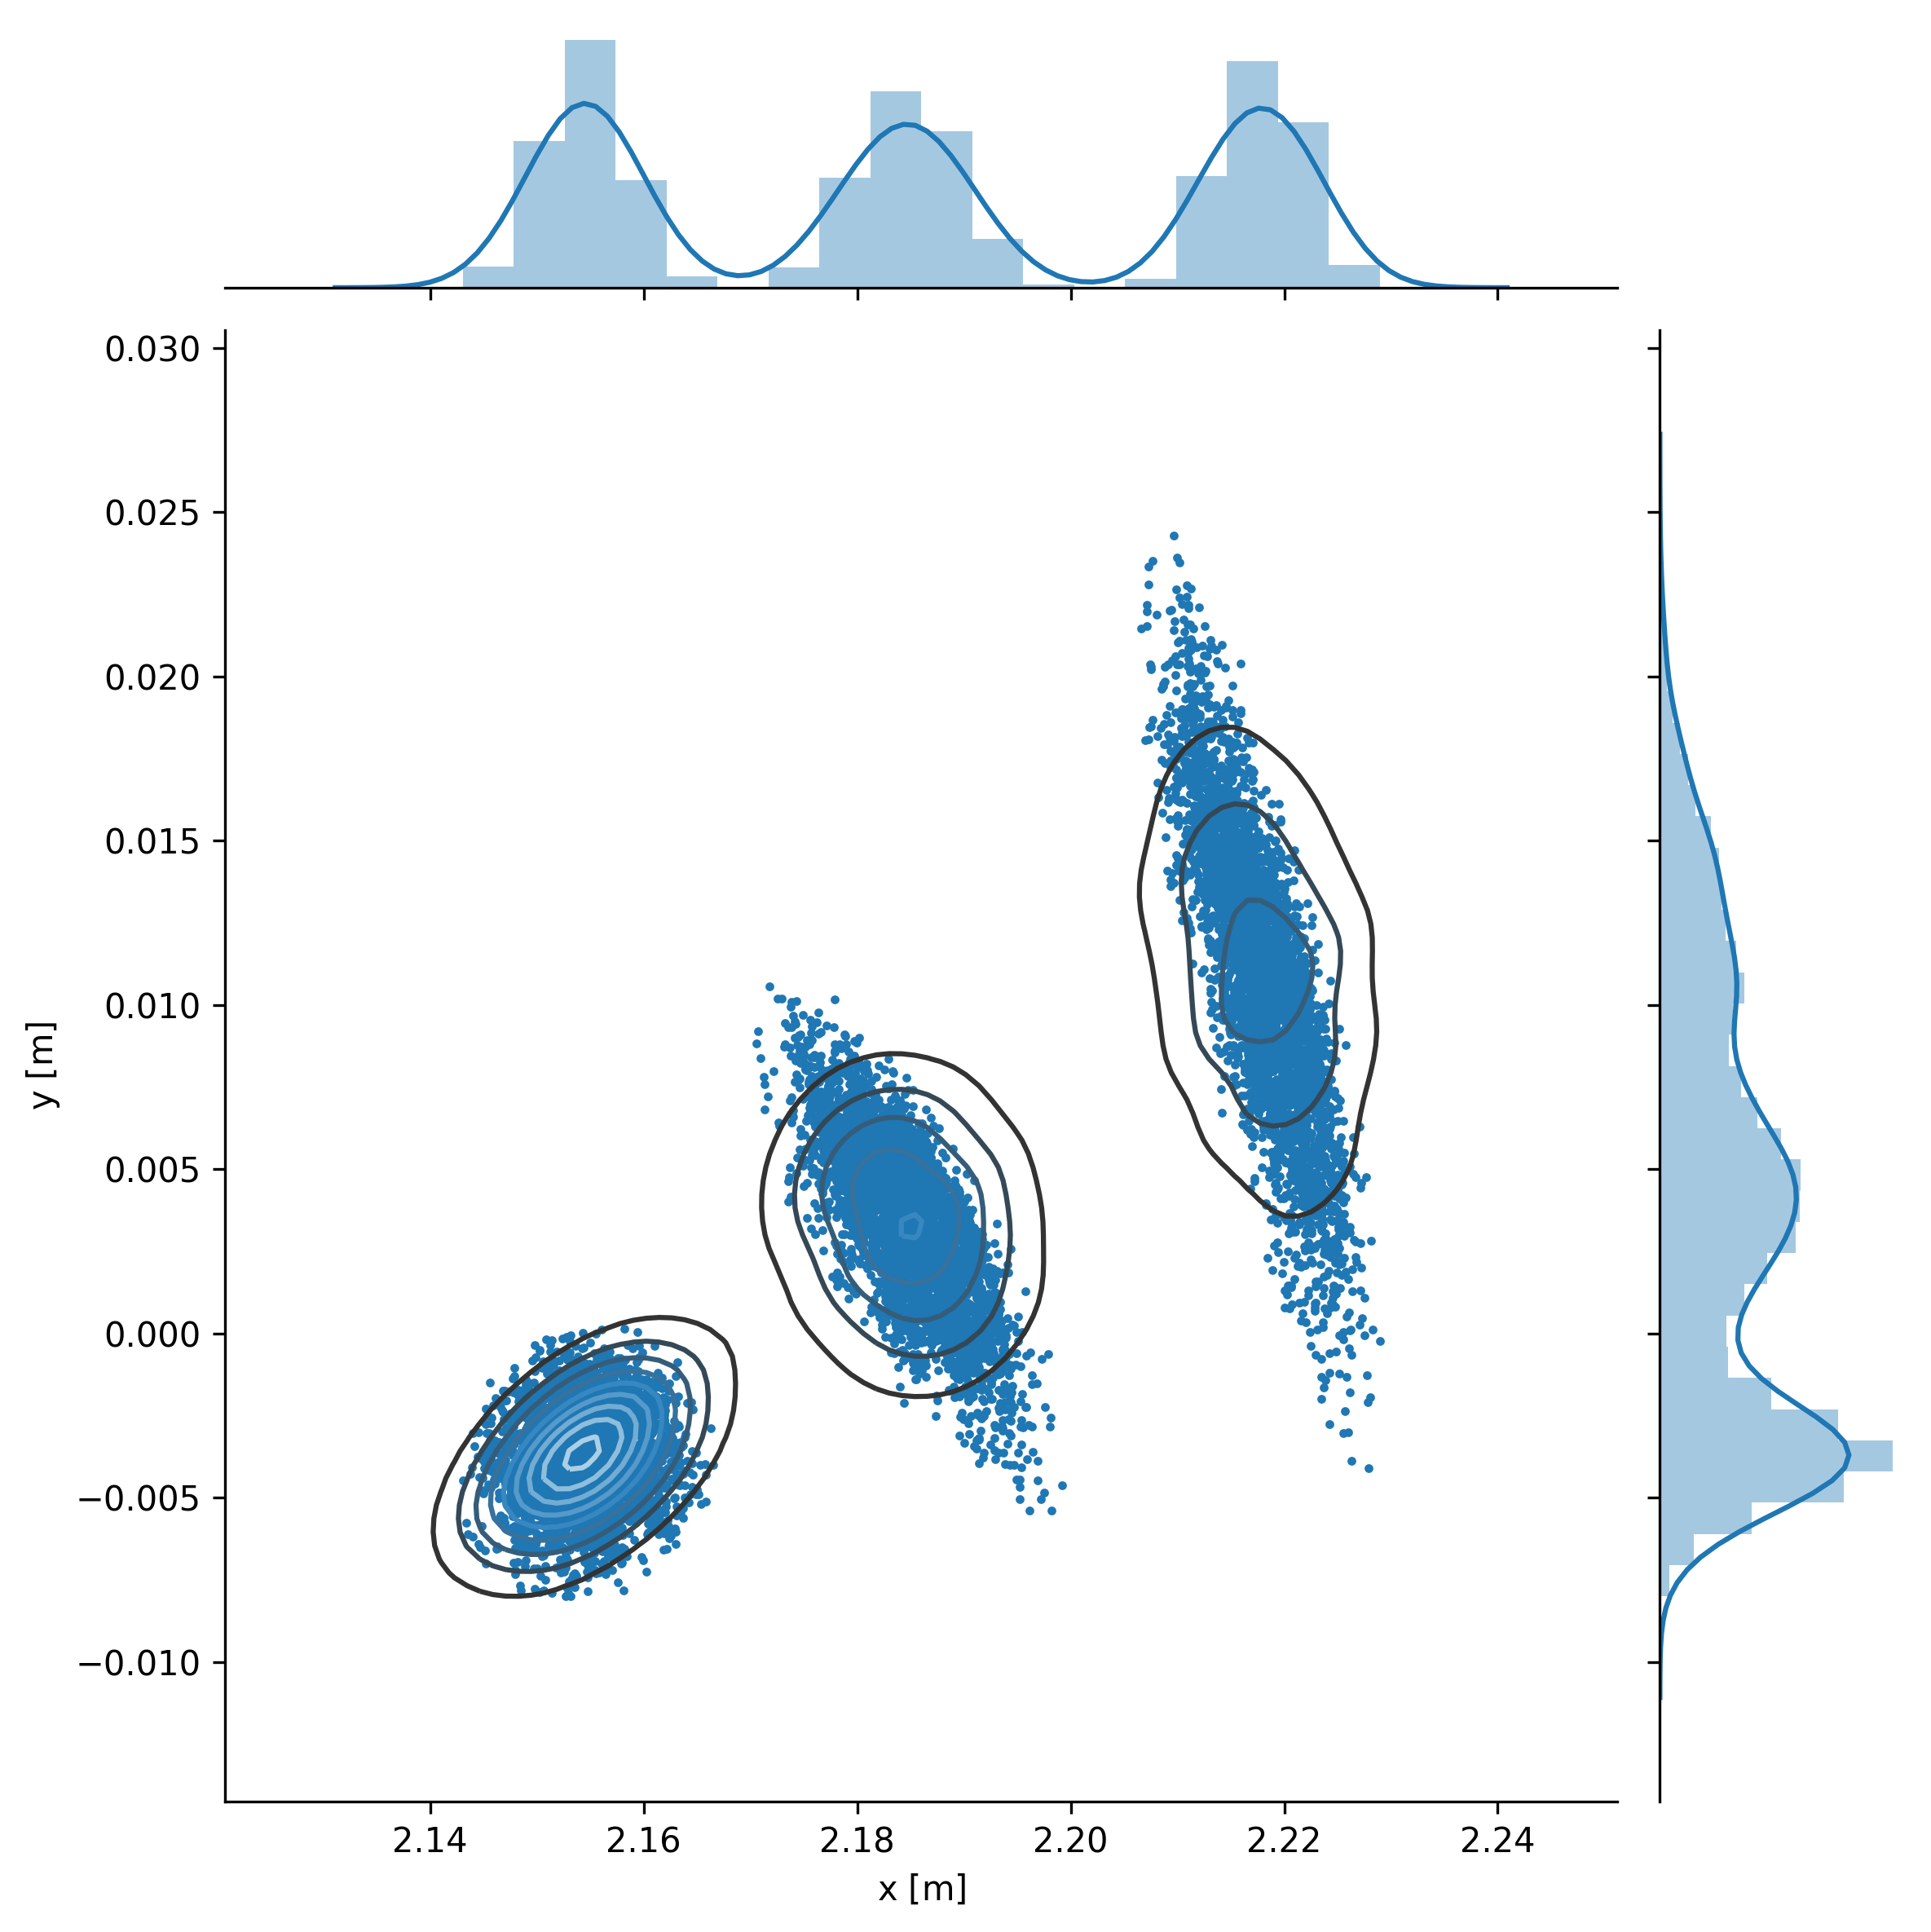

In [16]:
plt = plot_joint(dsets[0], xvar='x', yvar='y', join='all', marginals='kde+hist', step=3)

plt.show()

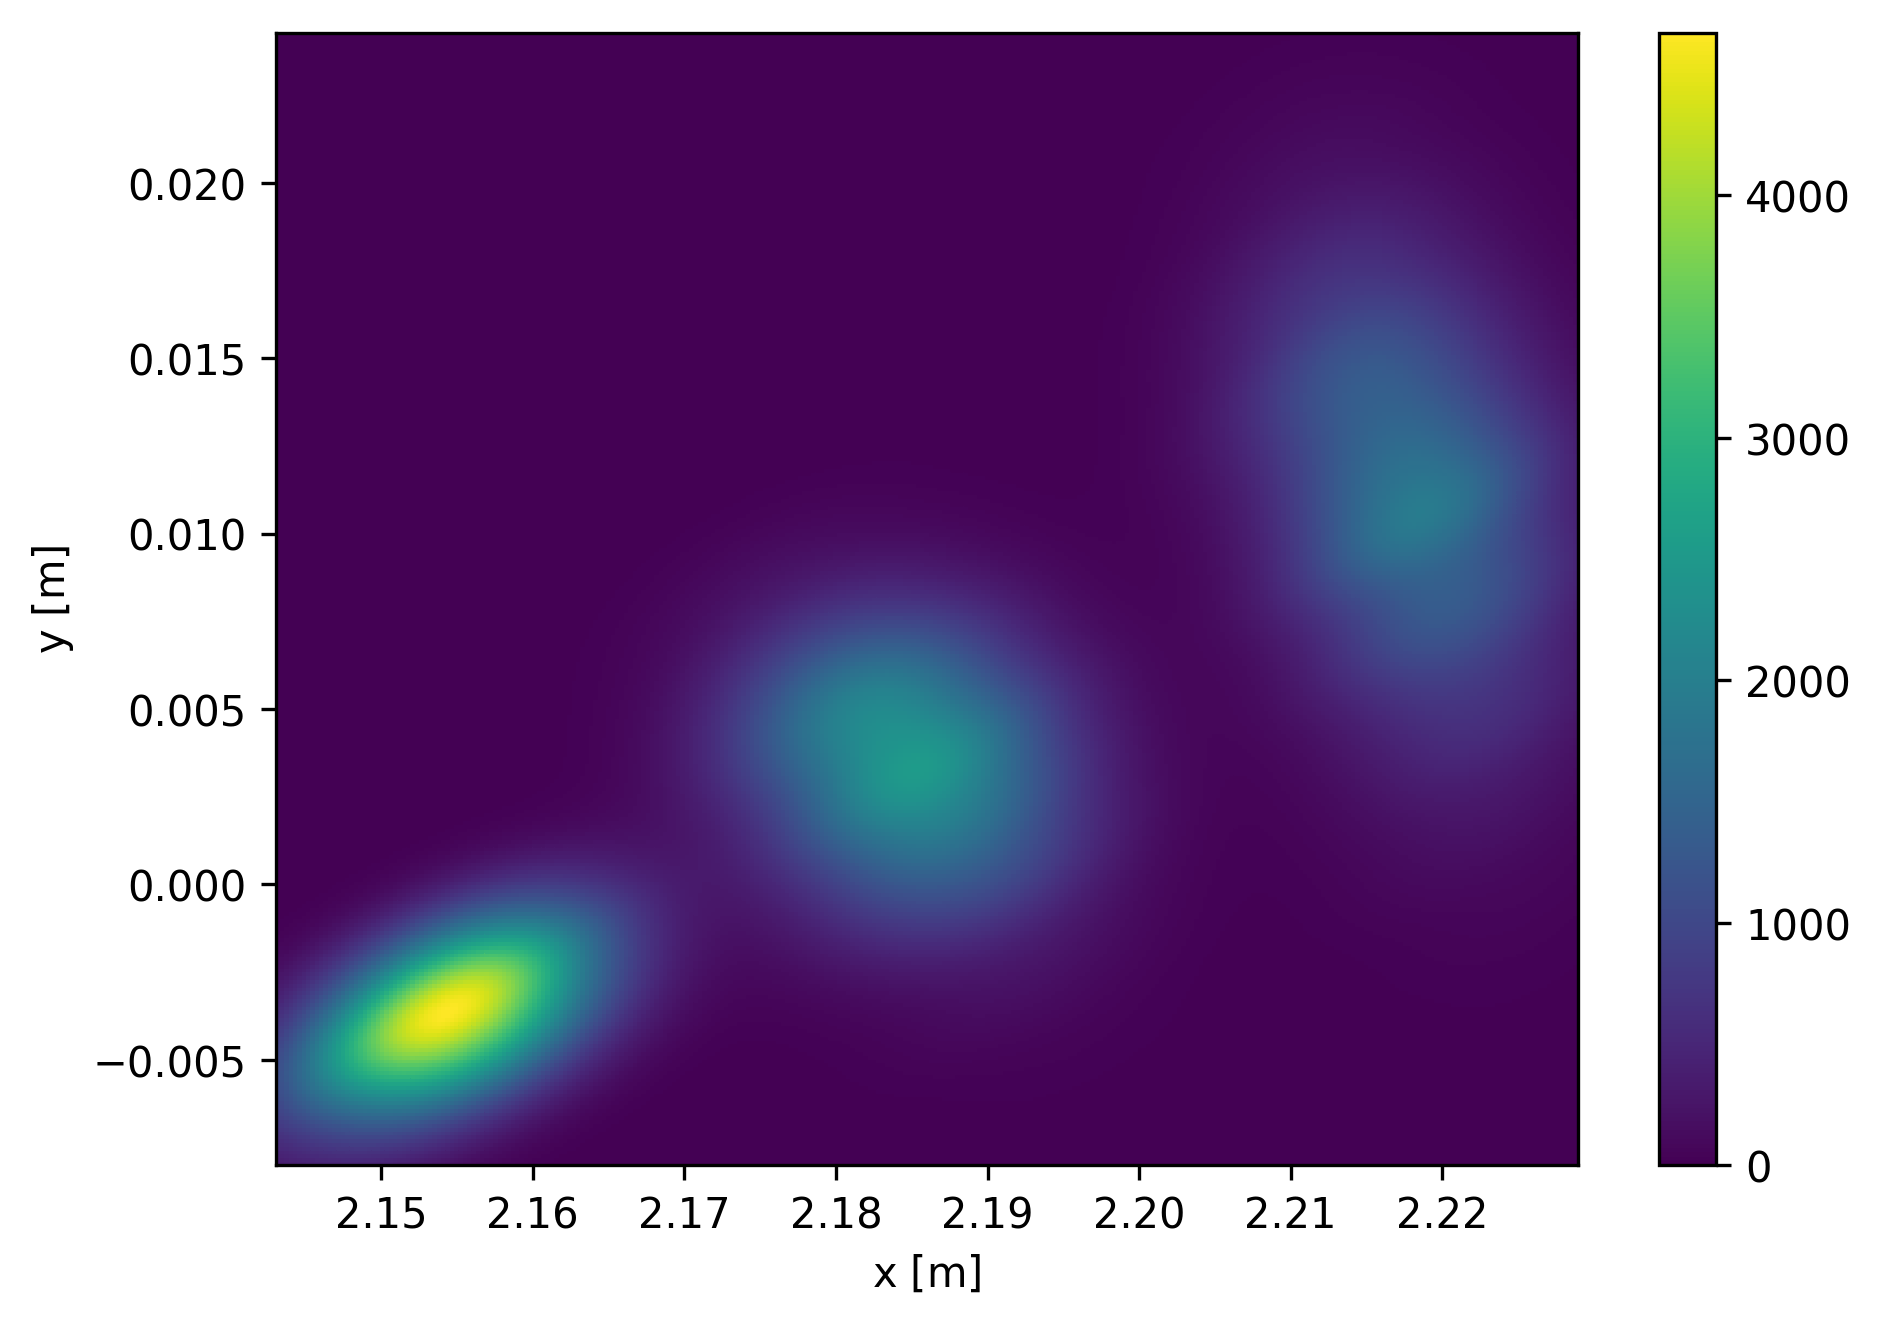

In [17]:
from opal.visualization.statistics import plots as stat_plots
plt = stat_plots.plot_density(dsets[0], xvar='x', yvar='y', step=3)

plt.show()

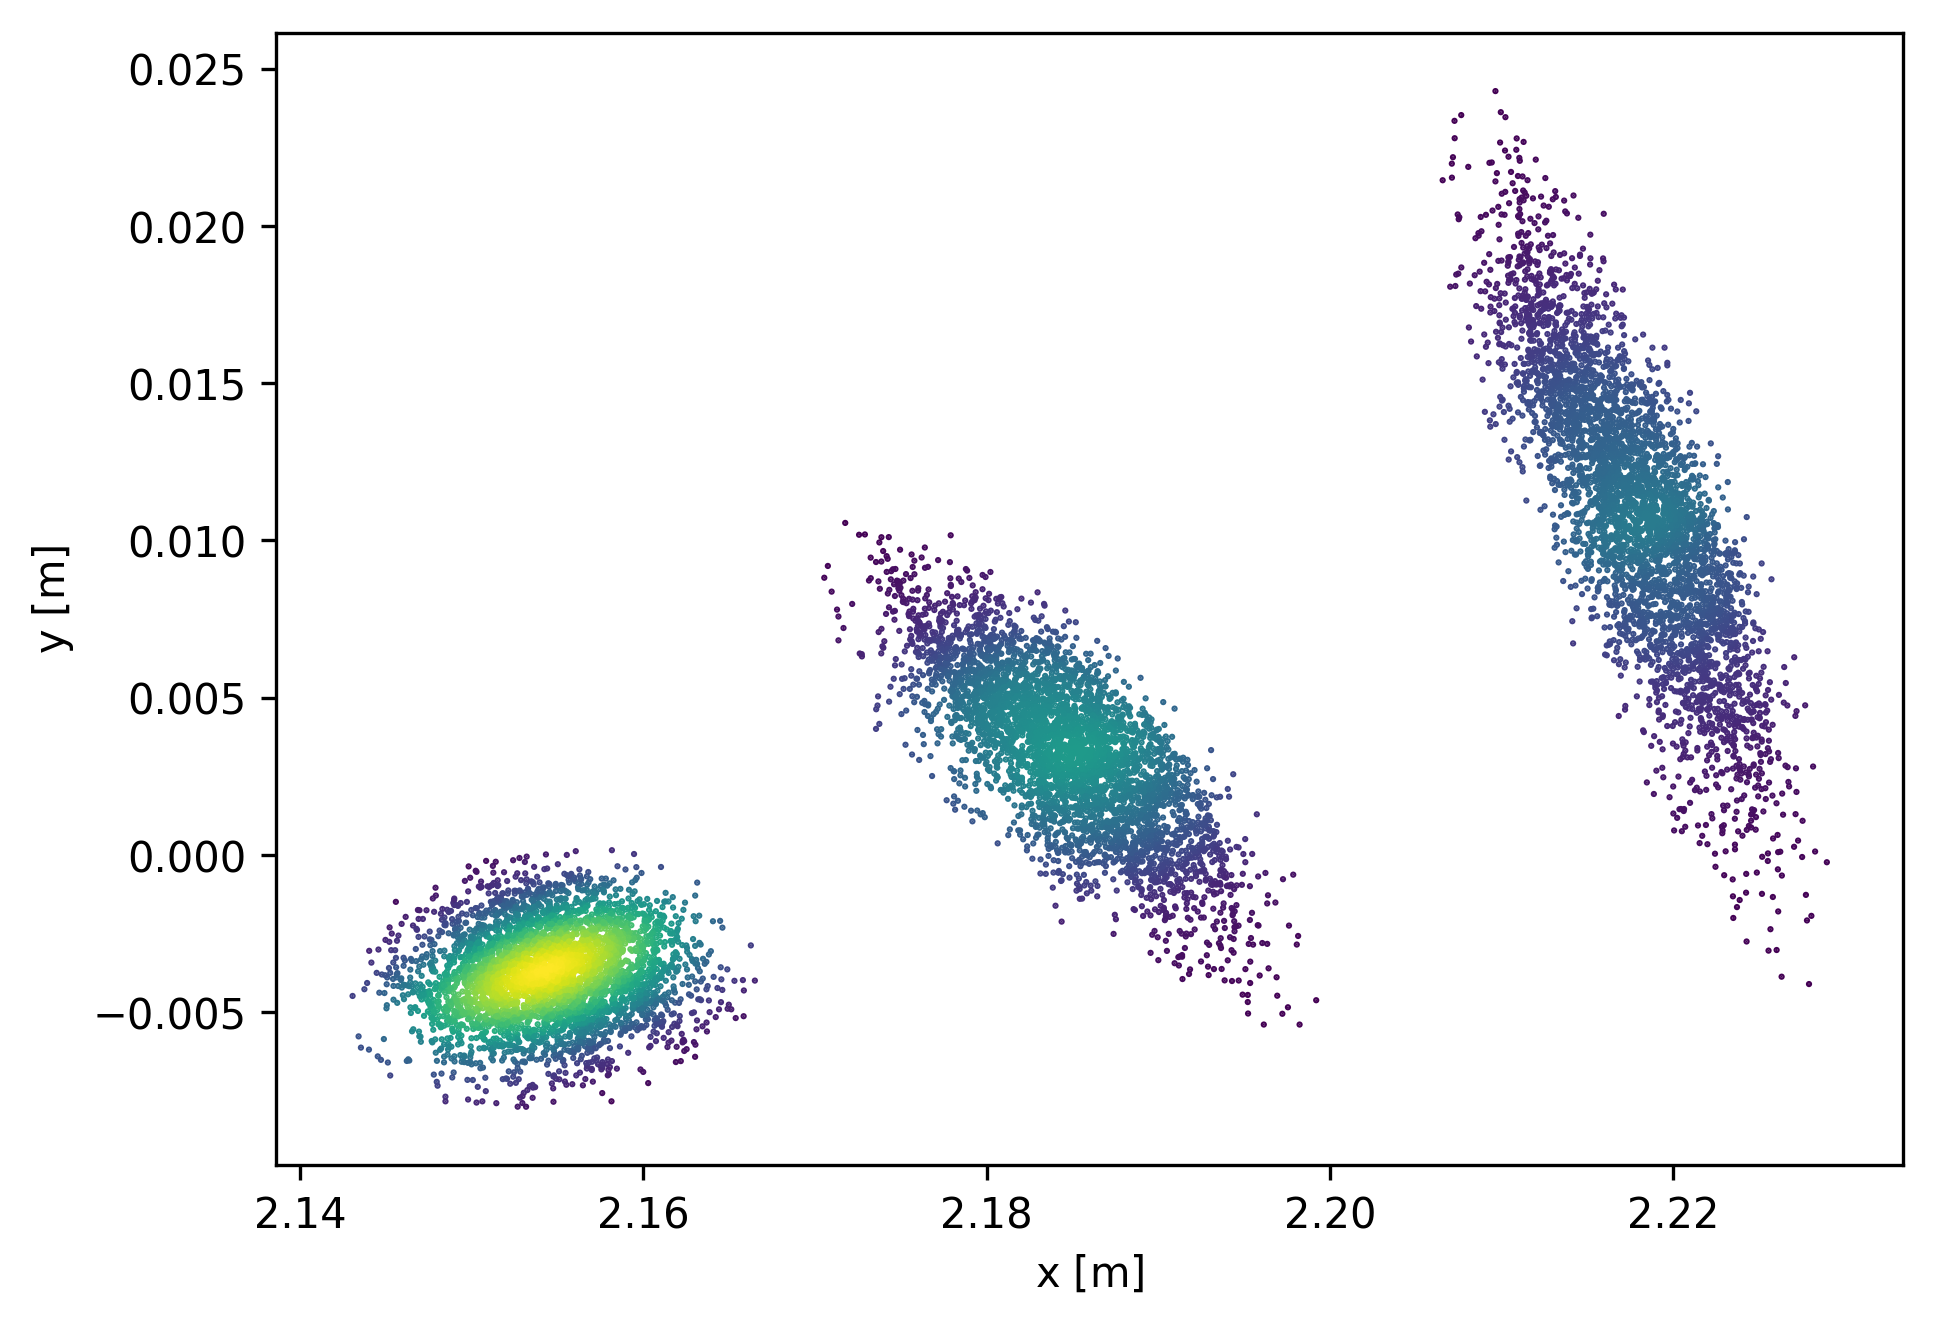

In [18]:
plt = plot_density(dsets[0], xvar='x', yvar='y', step=3)

plt.show()